In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, concordance_index_ipcw
from sksurv.util import Surv

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


from xgboost import XGBClassifier

# EDA and Data Preprocessing

In [8]:
Xc_train = pd.read_csv("./X_train_9po2I7U/X_train/clinical_train.csv")  # clinical training data
Xm_train = pd.read_csv("./X_train_9po2I7U/X_train/molecular_train.csv")  # molecular training data
target_train = pd.read_csv("target_train.csv")  # Target training data

### Visualising how the numerical features are distributed and vary with the OS_YEARS

In [14]:
yy = target_train["OS_YEARS"]
xc_cols = Xc_train.columns
xc_cols

Index(['ID', 'CENTER', 'BM_BLAST', 'WBC', 'ANC', 'MONOCYTES', 'HB', 'PLT',
       'CYTOGENETICS'],
      dtype='object')

In [18]:
numerical_cols = ["BM_BLAST", "WBC", "ANC", "MONOCYTES", "HB", "PLT"]
mm_scaler = MinMaxScaler()
# scaling each column so that it can be visualised
for col in numerical_cols:
    Xc_train[col] = mm_scaler.fit_transform(Xc_train[col].values.reshape(-1, 1))

xcc = Xc_train[numerical_cols]
yyc = mm_scaler.fit_transform(yy.values.reshape(-1, 1))

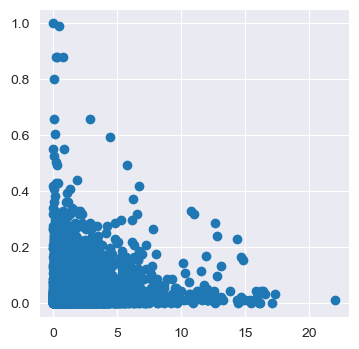

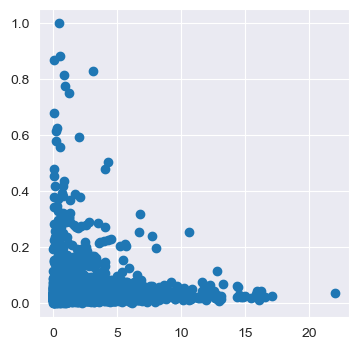

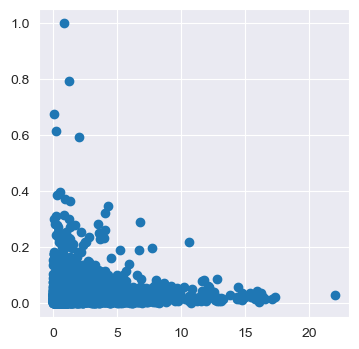

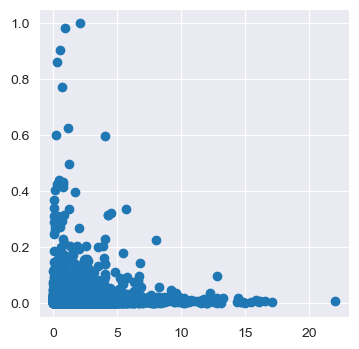

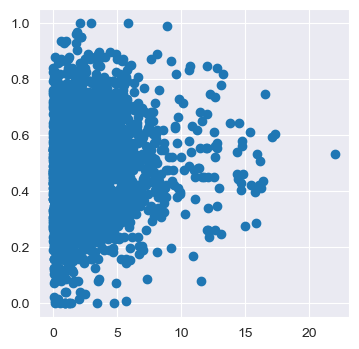

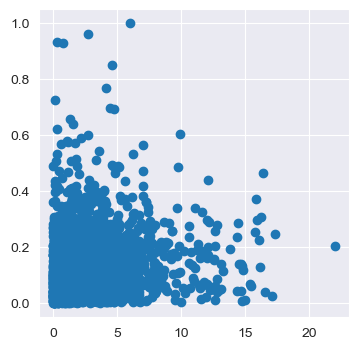

In [23]:
for i in range(len(numerical_cols)):
    lw = 2
    plt.figure(figsize=(4, 4))
    plt.scatter(yy, xcc[numerical_cols[i]], label=numerical_cols[i], l)